<a href="https://colab.research.google.com/github/avicahiBrevel/light_sim/blob/main/light_simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

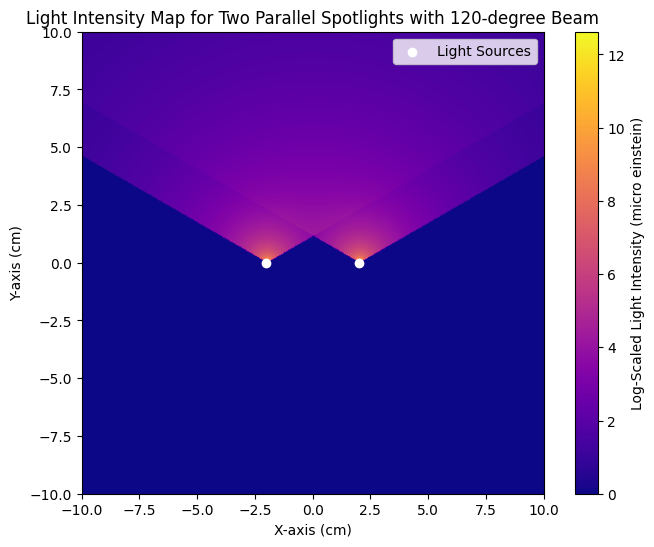

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid size and resolution
x_min, x_max = -10, 10  # in cm
y_min, y_max = -10, 10  # in cm
resolution = 500

# Create a grid of points
x = np.linspace(x_min, x_max, resolution)
y = np.linspace(y_min, y_max, resolution)
x_grid, y_grid = np.meshgrid(x, y)

# Define the positions of the two spotlights
light1 = np.array([-2, 0])  # in cm
light2 = np.array([2, 0])  # in cm

# Define the direction and beam angle for the spotlights
def is_within_beam(x, y, light_pos, direction, beam_angle):
    vector_to_point = np.array([x - light_pos[0], y - light_pos[1]])
    unit_vector_to_point = vector_to_point / (np.linalg.norm(vector_to_point, axis=0) + 1e-6)
    dot_product = unit_vector_to_point[0] * direction[0] + unit_vector_to_point[1] * direction[1]
    angle = np.arccos(np.clip(dot_product, -1.0, 1.0)) * 180 / np.pi
    return angle <= beam_angle / 2

# Define a function to calculate light intensity at a point
# Now incorporates spotlight beam angle
def light_intensity(x, y, light_pos, direction, beam_angle, intensity=1, attenuation=1):
    mask = is_within_beam(x, y, light_pos, direction, beam_angle)
    distance = np.sqrt((x - light_pos[0])**2 + (y - light_pos[1])**2)  # in cm
    intensity_values = intensity / (attenuation * distance**2 + 1e-6) * 100  # in micro einstein
    return np.where(mask, intensity_values, 0)

# Spotlight parameters
beam_angle = 120  # in degrees
attenuation_coefficient = 0.5  # Adjust as needed
direction1 = np.array([0, 1])  # Parallel direction for both lights

# Calculate the total intensity at each point on the grid
intensity1 = light_intensity(x_grid, y_grid, light1, direction1, beam_angle, attenuation=attenuation_coefficient)
intensity2 = light_intensity(x_grid, y_grid, light2, direction1, beam_angle, attenuation=attenuation_coefficient)
intensity_grid = intensity1 + intensity2

# Apply logarithmic scaling for better visualization
intensity_grid_log = np.log1p(intensity_grid)

# Plot the color map
plt.figure(figsize=(8, 6))
plt.imshow(
    intensity_grid_log,
    extent=[x_min, x_max, y_min, y_max],
    origin='lower',
    cmap='plasma',
    interpolation='bilinear'
)

plt.colorbar(label='Log-Scaled Light Intensity (micro einstein)')
plt.scatter([light1[0], light2[0]], [light1[1], light2[1]], color='white', label='Light Sources')
plt.title('Light Intensity Map for Two Parallel Spotlights with 120-degree Beam')
plt.xlabel('X-axis (cm)')
plt.ylabel('Y-axis (cm)')
plt.legend()
plt.grid(False)
plt.show()
